In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("project_data.csv")
df.head()


,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [3]:
y1 = df['ale']
y2 =df['sd_ale']
X = df.drop(['ale','sd_ale'], axis=1)  # Features (all columns except 'Target')
scaler_X = StandardScaler()
scaler_y1 = StandardScaler()
scaler_y2 = StandardScaler()


In [4]:
from sklearn.multioutput import MultiOutputRegressor
# Create an SVR instance
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1,y2,test_size=0.2, random_state=42)
svr = SVR(kernel='poly')

# Create a MultiOutputRegressor
multioutput_regressor = MultiOutputRegressor(svr)

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled=scaler_X.transform(X_test)
y1_scaled = scaler_y1.fit_transform(y1_test.values.reshape(-1,1))
y2_scaled = scaler_y2.fit_transform(y2_test.values.reshape(-1,1))


# Train the model with both target variables
multioutput_regressor.fit(X_train_scaled, np.column_stack((y1_train,y2_train)))
print('The accuracy of SVR with Z-score standarization is:',multioutput_regressor.score(X_test_scaled,np.column_stack((y1_test, y2_test)))*100)
print("\n")
y_pred = multioutput_regressor.predict(X_test_scaled)
mse_target_1 = mean_squared_error(y1_test.values, y_pred[:, 0])
mse_target_2 = mean_squared_error(y2_test.values, y_pred[:, 1])

print("Predicted values of ale:",y_pred[:,0])
print("\n")
print("Mean Squared Error - ale:", mse_target_1)
print("\n")
print("Predicted values for sd_ale:",y_pred[:,1])
print("\n")
print("Mean Squared Error - sd_ale:", mse_target_2)





The accuracy of SVR with Z-score standarization is: 62.270366598051496


Predicted values of ale: [0.96142048 0.94183605 1.06838232 0.49088125 1.34612625 1.01458263
 0.68490825 0.76277488 0.35456333 1.39593509 1.09668457 0.57779259
 0.73478986 0.99919456 0.90198294 1.00091261 1.52613596 1.01585868
 1.05861294 1.01664781 1.23485737 1.57287777]


Mean Squared Error - ale: 0.05976995129127809


Predicted values for sd_ale: [ 0.34757501  0.21960894  0.2283369   0.08150899  0.45952703  0.17025155
  0.21530945  0.30337199 -0.1645992   0.30531364  0.28915542  0.28492846
  0.22752919  0.36363591  0.23162056  0.2793069   0.54643614  0.2719286
  0.3752072   0.19721017  0.30019353  0.62541935]


Mean Squared Error - sd_ale: 0.024372734684412426


In [5]:
from sklearn.metrics import accuracy_score
# Feature names and values for prediction
feature_names = ['anchor_ratio','trans_range','node_density','iterations']
feature_values = [15,20,100,20]  # Replace with actual feature values

# Create a dictionary mapping feature names to values
feature_dict = dict(zip(feature_names, feature_values))

# Create a DataFrame with a single row representing the prediction sample
prediction_sample = pd.DataFrame([feature_dict])

# Scale the prediction sample using the same scaler
prediction_sample_scaled = scaler_X.transform(prediction_sample)

# Predict for both target variables
prediction_scaled = multioutput_regressor.predict(prediction_sample_scaled)
predicted_y1 = scaler_y1.inverse_transform(prediction_scaled[:, 0].reshape(-1,1))
predicted_y2 = scaler_y2.inverse_transform(prediction_scaled[:, 1].reshape(-1,1))


# Print the predicted values for both target variables
print('Predicted ale:', predicted_y1)
print('Predicted sd_ale:', predicted_y2)

Predicted ale: [[1.68459748]]
Predicted sd_ale: [[0.38135925]]


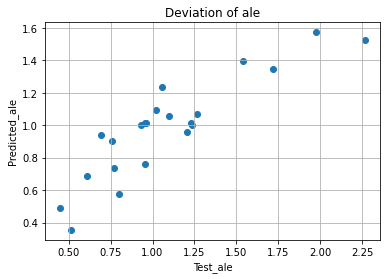

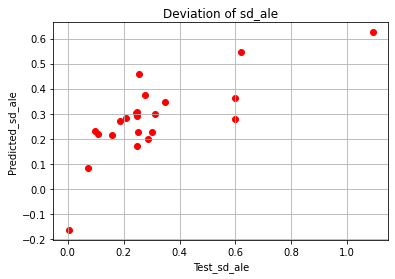

In [6]:
x= y1_test.values
y = y_pred[:,0]



# Create a line plot for deviation of ale
plt.scatter(x, y)
plt.xlabel('Test_ale')
plt.ylabel('Predicted_ale')
plt.title('Deviation of ale')
plt.grid(True)
plt.show()

x1= y2_test.values
y1 = y_pred[:,1]



# Create a line plot for deviation of sd_ale
plt.scatter(x1, y1,color='red')
plt.xlabel('Test_sd_ale')
plt.ylabel('Predicted_sd_ale')
plt.title('Deviation of sd_ale')
plt.grid(True)
plt.show()
